# MSDE631 SQL-NoSQL | Regis University
### Instructor: Dr. Busch

TITLE  | Date | Author |   Notes |
:-----:|:----:|:------:|:-------:|
Project 8: Your PDA on the Cloud  |25 April 2023 | Ken Dizon | Using GCP

**TASK / Content**

In this assignment you are required to deploy your SQL_PDA on Google Cloud Platform (GCP).

1. Use MySQL on GCP to create your PDA you proposed at the beginning of this course.
    * 1.2 Create DB
    * 1.3 Create Tables
2. Execute at least 30 insertions in each of your tables.
3. Execute at least three SQL commands that you think useful for your PDA.
    * 3.1 Command #1
    * 3.2 Command #2
    * 3.3 Command #3
4. Project Recap
_________

## 1. Initial PDA
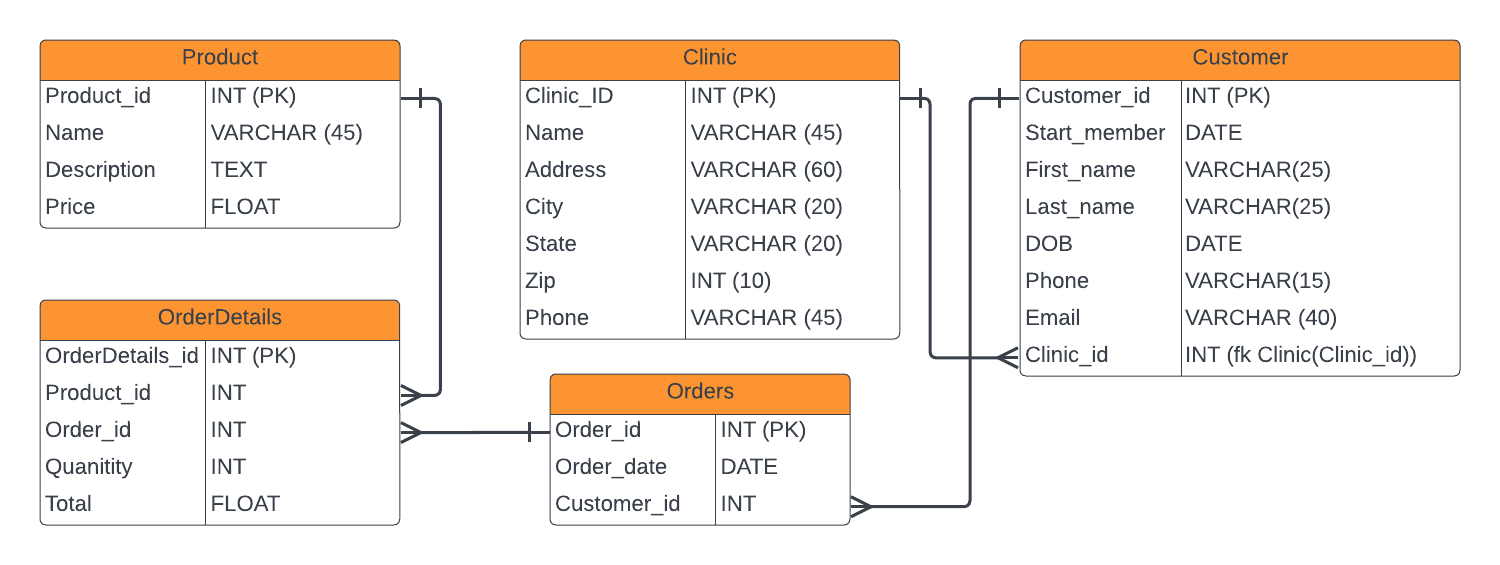

In [16]:
import pymysql

# Connection details
host = '34.31.90.30'
user = 'root'  
passwd = None  
db = None  

# Connect to the MySQL server
conn = pymysql.connect(
    host=host,
    user=user,
    passwd=passwd,
    db=db
)

# Create a cursor object to interact with the database
cursor = conn.cursor()
# Execute a SQL query
cursor.execute('SHOW DATABASES')

# Fetch all the databases
databases = cursor.fetchall()

# Print the list of databases
print("List of databases:")
for db in databases:
    print(db[0])

List of databases:
information_schema
SailClub
mysql
performance_schema
sys


**1.2 Create DB**

In [17]:
# Query
database_name = 'SM_DBMS'
cursor.execute(f'CREATE DATABASE {database_name}')

conn.commit()
print(f"Database '{database_name}' created successfully!")

Database 'SM_DBMS' created successfully!


In [19]:
query = '''USE SM_DBMS'''
cursor.execute(query)
conn.commit()
print("using: SM_DBMS")

using: SM_DBMS


**1.3 Create Tables**

In [20]:
# Table: Product
query = '''
CREATE TABLE Product (
    Product_id INT NOT NULL,
    Name VARCHAR(45) NULL,
    Description TEXT(300) NULL,
    Price FLOAT NULL,
    PRIMARY KEY (Product_id)
)
'''

cursor.execute(query)
conn.commit()

print("Product table created")

Product table created


In [23]:
# Table: Clinic
query = '''
CREATE TABLE Clinic (
  `Clinic_id` INT NOT NULL,
  `Name` VARCHAR(45) NULL,
  `Address` VARCHAR(45) NULL,
  `City` VARCHAR(45) NULL,
  `State` VARCHAR(45) NULL,
  `Zip` INT NULL,
  `Phone` VARCHAR(45) NULL,
  PRIMARY KEY (`Clinic_id`)
)
'''

cursor.execute(query)
conn.commit()

print("Clinic table created")

Clinic table created


In [24]:
# Table: Customer
query = '''
CREATE TABLE Customer (
  `Customer_id` INT NOT NULL,
  `Start_date` DATE NULL,
  `First_name` VARCHAR(45) NULL,
  `Last_name` VARCHAR(45) NULL,
  `DOB` DATE NULL,
  `Phone` VARCHAR(45) NULL,
  `Email` VARCHAR(45) NULL,
  `Clinic_id` INT NULL,
  PRIMARY KEY (`Customer_id`),
    FOREIGN KEY (`Clinic_id`)
    REFERENCES `SM_DBMS`.`Clinic` (`Clinic_id`)
)
'''
cursor.execute(query)
conn.commit()

print("Customer table created")

Customer table created


In [25]:
# Table: Orders
query = '''
CREATE TABLE Orders (
  `Order_id` INT NOT NULL,
  `Order_date` DATE NULL,
  `Customer_id` INT NULL,
  PRIMARY KEY (`Order_id`),
    FOREIGN KEY (`Customer_id`)
    REFERENCES `SM_DBMS`.`Customer` (`Customer_id`)
)
'''
cursor.execute(query)
conn.commit()

print("Orders table created")

Orders table created


In [29]:
# Table: OrderDetails
query = '''
CREATE TABLE OrderDetails (
  `OrderDetails_id` INT NOT NULL,
  `Product_id` INT NULL,
  `Order_id` INT NULL,
  `Quantity` INT NULL,
  PRIMARY KEY (`OrderDetails_id`),
    FOREIGN KEY (`Product_id`)
    REFERENCES `Product` (`Product_id`),
    FOREIGN KEY (`Order_id`)
    REFERENCES `Orders` (`Order_id`)
)
'''
cursor.execute(query)
conn.commit()

print("OrderDetails table created")

OrderDetails table created


In [30]:
# Show Tables
cursor.execute("SHOW TABLES")
tables = cursor.fetchall()

# Print the table names
print("Tables:")
for table in tables:
    print(table[0])

Tables:
Clinic
Customer
OrderDetails
Orders
Product


- **Ensure this is also displayed/deployed on GCP**
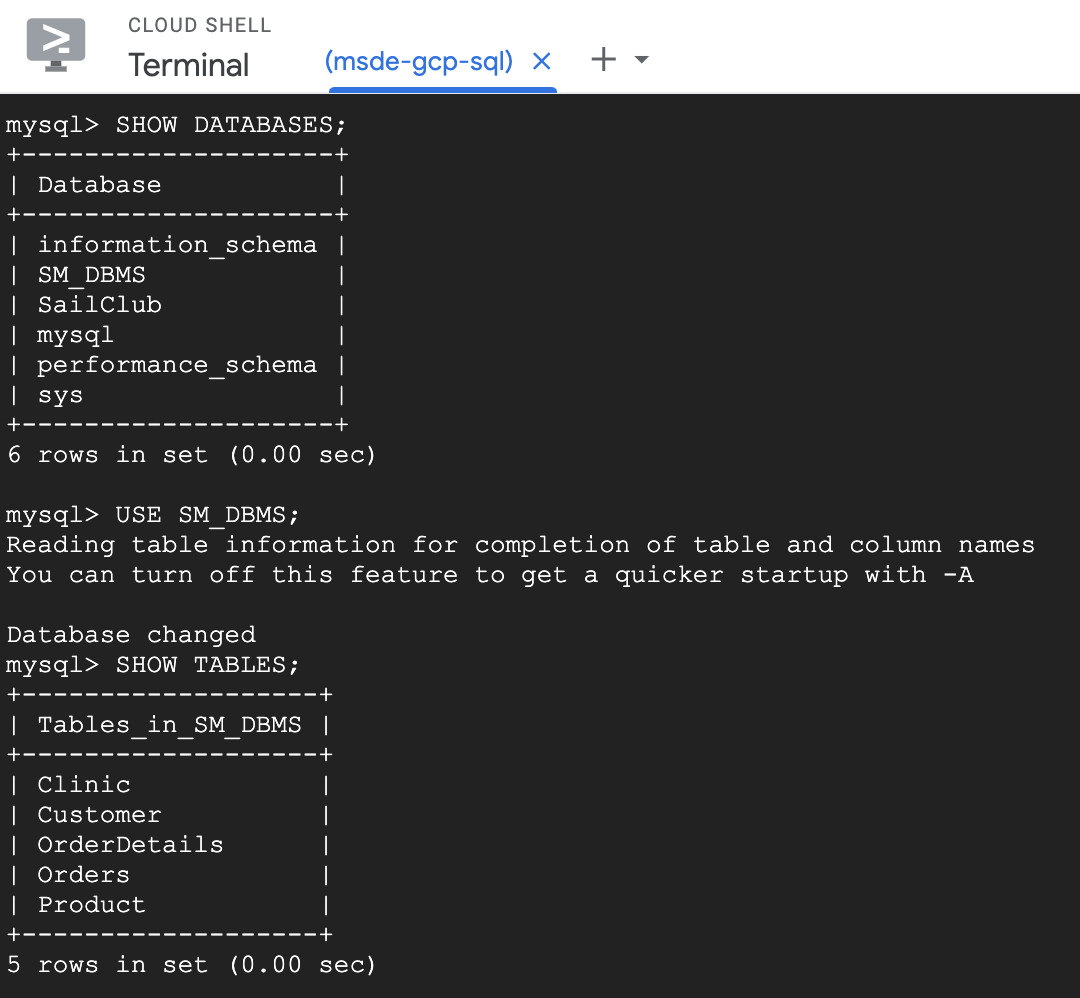

## 2. Execute at least 30 insertions in each of your tables.

**NOTE:** As we had to restart the gcp instance, there is no need to create the db and tables. 

SCHEMA:
- Product: Product_id, Name, Description, Price 
- Clinic: Clinic_id, Name, Address, City, State, Zip, Phone
- Customer: Customer_id, Start_date First_name, Last_name, DOB, Phone, Email, Clinic_id
- Orders: Order_id, Order_date, Customer_id
- OrderDetails: OrderDetails_id, Product_id, Order_id, Quantity

In [2]:
import pymysql

# Connection details
host = '34.31.90.30'
user = 'root'  
passwd = None  
db = None  

# Connect to the MySQL server
conn = pymysql.connect(
    host=host,
    user=user,
    passwd=passwd,
    db=db
)

In [3]:
# Create a cursor object to interact with the database
cursor = conn.cursor()
# Execute a SQL query
cursor.execute('SHOW DATABASES')

# Fetch all the databases
databases = cursor.fetchall()

# Print the list of databases
print("List of databases:")
for db in databases:
    print(db[0])

List of databases:
information_schema
SM_DBMS
SailClub
mysql
performance_schema
sys


In [4]:
query = '''USE SM_DBMS'''
cursor.execute(query)
conn.commit()
print("using: SM_DBMS")

using: SM_DBMS


In [5]:
query = '''DESCRIBE Product'''
cursor.execute(query)

results = cursor.fetchall()
for row in results:
    print(row)

('Product_id', 'int(11)', 'NO', 'PRI', None, '')
('Name', 'varchar(45)', 'YES', '', None, '')
('Description', 'text', 'YES', '', None, '')
('Price', 'float', 'YES', '', None, '')


In [6]:
# Data 
product_data = 'Generated_Data/product_data.txt'
clinic_data = 'Generated_Data/clinic_data.txt'
customer_data = 'Generated_Data/customer_data.txt'
orderdetails_data = 'Generated_Data/orderdetails_data.txt'
orders_data = 'Generated_Data/orders_data.txt'

In [7]:
# Check data
def view_file(file_path):
    with open(file_path, "r") as file:
        print(f"Contents of {file_path} (first 5):")
        for i in range(5):
            line = file.readline().strip()
            if line:
                print(line)
            else:
                break

view_file(clinic_data)

Contents of Generated_Data/clinic_data.txt (first 5):
1;Garcia, Harrell and Phillips;3197 Koch Tunnel Apt. 731;New Mikeview;Nevada;54039;520-541-1189x358
2;Moore LLC;1582 Noah Orchard;Brianland;Hawaii;93431;108-327-9309
3;Kim, Taylor and Carter;099 Jonathan Wells;North Emilyberg;West Virginia;43320;074-315-0439x527
4;Phillips, Edwards and Hoffman;70858 Neal Lights Apt. 480;South Thomas;Texas;19190;001-220-765-4080x40829
5;Brown PLC;85134 Morris Way;West Angelaberg;Texas;82725;(392)198-2487x7041


In [8]:
# Pre defined from txt file
delimiter = ';'

## Importing data into Tables

In [10]:
# Product
with open(product_data, 'r') as file:
    for line in file:
        values = line.strip().split(delimiter)
        product_id = int(values[0])
        name = values[1]
        description = values[2]
        price = float(values[3])

        insert_query = f'''
        INSERT INTO Product (Product_id, Name, Description, Price)
        VALUES ({product_id}, '{name}', '{description}', {price})
        '''
        
        cursor.execute(insert_query)
        
conn.commit()

In [16]:
query = '''SELECT COUNT(*) as count FROM Product'''

cursor.execute(query)
result = cursor.fetchone()
count = result[0]

print(f'Number of rows in the Product table: {count}')

Number of rows in the Product table: 30


In [19]:
import json
from pprint import pprint

In [27]:
q1 = '''SELECT * FROM Product ORDER BY Product_id ASC LIMIT 1'''
cursor.execute(q1)
first_row = cursor.fetchone()

q2 = '''SELECT * FROM Product ORDER BY Product_id DESC LIMIT 1'''
cursor.execute(q2)
last_row = cursor.fetchone()

pprint(first_row)
print('\n')
pprint(last_row)

(1,
 'Knee braces',
 'designed to support and protect the knee joint during physical activity or '
 'recovery from injury.',
 22.02)


(30,
 'Recovery tools',
 'designed to aid in muscle recovery, such as massage guns, percussive therapy '
 'devices, or pneumatic compression boots.',
 17.29)


In [28]:
with open(clinic_data, 'r') as file:
    for line in file:
        values = line.strip().split(delimiter)
        clinic_id = int(values[0])
        name = values[1]
        address = values[2]
        city = values[3]
        state = values[4]
        zip = values[5]
        phone = values[6]
        
        insert_query = f'''
        INSERT INTO Clinic (Clinic_id, Name, Address, City, State, Zip, Phone)
        VALUES ({clinic_id}, '{name}', '{address}', '{city}', '{state}', '{zip}', '{phone}')
        '''

        cursor.execute(insert_query)
conn.commit()

In [29]:
query = '''SELECT COUNT(*) as count FROM Clinic'''

cursor.execute(query)
result = cursor.fetchone()
count = result[0]

print(f'Number of rows in the Clinic table: {count}')

Number of rows in the Clinic table: 30


In [30]:
with open(customer_data, 'r') as file:
    for line in file:
        values = line.strip().split(delimiter)
        customer_id = int(values[0])
        start_date = values[1]
        first_name = values[2]
        last_name = values[3]
        dob = values[4]
        phone = values[5]
        email = values[6]
        clinic_id = int(values[7])
        
        insert_query = f'''
        INSERT INTO Customer (Customer_id, Start_date, First_name, Last_name, DOB, Phone, Email, Clinic_id)
        VALUES ({customer_id}, '{start_date}', '{first_name}', '{last_name}', '{dob}', '{phone}', '{email}', {clinic_id})
        '''
        
        cursor.execute(insert_query)
conn.commit()

In [31]:
query = '''SELECT COUNT(*) as count FROM Customer'''

cursor.execute(query)
result = cursor.fetchone()
count = result[0]

print(f'Number of rows in the Customer table: {count}')

Number of rows in the Customer table: 3000


In [32]:
with open(orders_data, 'r') as file:
    for line in file:
        values = line.strip().split(delimiter)
        order_id = int(values[0])
        order_date = values[1]
        customer_id = int(values[2])
        
        insert_query = f'''
        INSERT INTO Orders (Order_id, Order_date, Customer_id)
        VALUES ({order_id}, '{order_date}', {customer_id})
        '''
        
        cursor.execute(insert_query)
conn.commit()

In [33]:
query = '''SELECT COUNT(*) as count FROM Orders'''

cursor.execute(query)
result = cursor.fetchone()
count = result[0]

print(f'Number of rows in the Customer table: {count}')

Number of rows in the Customer table: 5000


In [34]:
with open(orderdetails_data, 'r') as file:
    for line in file:
        values = line.strip().split(delimiter)
        order_details_id = int(values[0])
        product_id = int(values[1])
        order_id = int(values[2])
        quantity = int(values[3])
 
        insert_query = f'''
        INSERT INTO OrderDetails (OrderDetails_id, Product_id, Order_id, Quantity)
        VALUES ({order_details_id}, {product_id}, {order_id}, {quantity})
        '''
        
        cursor.execute(insert_query)
conn.commit()

In [35]:
query = '''SELECT COUNT(*) as count FROM OrderDetails'''

cursor.execute(query)
result = cursor.fetchone()
count = result[0]

print(f'Number of rows in the Customer table: {count}')

Number of rows in the Customer table: 5000


## 3. Execute at least three SQL commands that you think useful for your PDA.

In [1]:
# GCP reconnection Connection
import pymysql

# Connection details
host = '34.31.90.30'
user = 'root'  
passwd = None  
db = None  

# Connect to the MySQL server
conn = pymysql.connect(
    host=host,
    user=user,
    passwd=passwd,
    db=db
)

# Create a cursor object to interact with the database
cursor = conn.cursor()

# Initial start-up
query = '''USE SM_DBMS'''
cursor.execute(query)
conn.commit()
print("using: SM_DBMS")

using: SM_DBMS


### 3.1: I want to find the total price for an order given the quantity and price.

In [2]:
# user input for the clinic_id
order_id = input("Enter the order_id: ")

Enter the order_id:  257


In [3]:
query = f'''
SELECT od.Product_id, od.Quantity, p.Price
FROM OrderDetails od
JOIN Product p ON od.Product_id = p.Product_id
WHERE od.Order_id = {order_id}
'''
cursor.execute(query)
result = cursor.fetchone()

if result is not None:
    # Unpack the retrieved values
    product_id, quantity, price = result
    
    # Calculate the total price
    total_price = quantity * price
    
    # Print the result
    print(f"Total price for Order {order_id}: ${total_price:.2f}")
else:
    print(f"No order found with Order_id = {order_id}")

Total price for Order 257: $19.79


### 3.2: For a specific Clinic, I want to find the customer who has placed the most orders
(price * quanitiy) and list all their products

In [7]:
# user input for the clinic_id
clinic_id = input("Enter the clinic_id: ")

Enter the clinic_id:  15


In [15]:
query = '''
    SELECT c.Customer_id, c.First_name, c.Last_name, COUNT(o.Order_id) AS num_orders
    FROM Customer c
    JOIN Orders o ON c.Customer_id = o.Customer_id
    WHERE c.Clinic_id = %s
    GROUP BY c.Customer_id
    ORDER BY num_orders DESC
    LIMIT 1
'''
cursor.execute(query, (clinic_id,))
result = cursor.fetchone()


if result:
    print(f"Top customer with highest Orders count for clinic {clinic_id} is {result[1]} {result[2]} with {result[3]} orders.")
else:
    print(f"No customers found for clinic {clinic_id}.")

Top customer with highest Orders count for clinic 15 is Betty Russell with 6 orders.


### 3.3: I want to find search a customer by first and last name, and return all their orders. 

In [16]:
# user input for first and last name
first_name = input("Enter First Name: ")
last_name = input("Enter Last Name: ")

Enter First Name:  Betty
Enter Last Name:  Russell


In [18]:
query = '''
    SELECT o.Order_id, o.Order_date, p.Name, od.Quantity
    FROM Customer c
    JOIN Orders o ON c.Customer_id = o.Customer_id
    JOIN OrderDetails od ON o.Order_id = od.Order_id
    JOIN Product p ON od.Product_id = p.Product_id
    WHERE c.First_name = %s AND c.Last_name = %s
'''

cursor.execute(query, (first_name, last_name))
results = cursor.fetchall()

# Print the results
if results:
    print(f"Orders for customer {first_name} {last_name}:")
    for result in results:
        print(f"Order ID: {result[0]}, Order date: {result[1]}, Product name: {result[2]}, Quantity: {result[3]}")
else:
    print(f"No orders found for customer {first_name} {last_name}.")

Orders for customer Betty Russell:
Order ID: 1374, Order date: 2022-05-26, Product name: Shin guards, Quantity: 8
Order ID: 1374, Order date: 2022-05-26, Product name: Sports-specific shoes, Quantity: 3
Order ID: 3965, Order date: 2021-11-17, Product name: Foam rollers, Quantity: 2
Order ID: 3965, Order date: 2021-11-17, Product name: Massage balls, Quantity: 1
Order ID: 3965, Order date: 2021-11-17, Product name: Heart rate monitors, Quantity: 5
Order ID: 3965, Order date: 2021-11-17, Product name: Sports goggles, Quantity: 2
Order ID: 4673, Order date: 2021-12-06, Product name: Energy gels, Quantity: 2
Order ID: 4673, Order date: 2021-12-06, Product name: Blister pads, Quantity: 1
Order ID: 4938, Order date: 2023-04-02, Product name: Ankle braces, Quantity: 6


# Project Recap

This was a useful project that can be applied into real world scenrios that enable cloud computing and a SQL database to perform CRUD and ETL methods for an inventory database management system. The use cases may be applied to numerous industries (Manufacturing, E-Commerce, Healthcare) to enable the tracking of stock. 

It was helpful to understand where data is stored and how it can be retrieved. As highlighted by the subheadings `1, 2, and 3` allocated in this notebook. 